# Highway-Rail Grade Crossing Accident Data Railroads
data found from https://data.transportation.gov/Railroads/Highway-Rail-Grade-Crossing-Accident-Data/7wn6-i5b9 :
export -> csv for excel

In [1]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import os
import pandas as pd
import seaborn as sns

In [2]:
wd = os.getcwd()

In [3]:
# move a copy of the csv into your working directory, or change this path
railcrossing = pd.read_csv(os.path.join(wd, 'Highway-Rail_Grade_Crossing_Accident_Data.csv'))
railcrossing

C:\Users\Skurai\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (6,7,8,25,26,38,42,50,51,52,53,59,64,69,87,88,89,95,97,98,99,100,101,106,126,127,128,129,139,147,148,149,150,151,152) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Railroad Code,Railroad Name,Report Year,Incident Number,Incident Year,Incident Month,Other Railroad Code,Other Railroad Name,Other Incident Number,Other Incident Year,...,Other Railroad SMT Grouping,Other Parent Railroad Code,Other Parent Railroad Name,Other Railroad Holding Company,Maintenance Railroad Grouping,Maintenance Railroad Class,Maintenance Railroad SMT Grouping,Maintenance Parent Railroad Code,Maintenance Parent Railroad Name,Maintenance Railroad Holding Company
0,BNSF,BNSF Railway Company,2009,CA0109200,9,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Not Applicable,Class 1,SMT-5 - BNSF,BNSF,BNSF Railway Company,BNSF Railway Company
1,BNSF,BNSF Railway Company,2009,CA0109201,9,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Not Applicable,Class 1,SMT-6 - Union Pacific and KCS,UP,Union Pacific Railroad Company,Union Pacific Railroad Company
2,ARR,Alaska Railroad Corporation,2011,20110151,11,12,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Not Applicable,Class 2,"SMT-7 - Commuter West, High Speed Rail, some T...",ARR,Alaska Railroad Corporation,Not Assigned
3,BNSF,BNSF Railway Company,2008,CA0208200,8,2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Not Applicable,Class 1,SMT-5 - BNSF,BNSF,BNSF Railway Company,BNSF Railway Company
4,BNSF,BNSF Railway Company,2008,CA0208201,8,2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Not Applicable,Class 1,SMT-5 - BNSF,BNSF,BNSF Railway Company,BNSF Railway Company
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240330,CSX,CSX Transportation,2014,000124504,14,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Not Applicable,Class 1,SMT-9 - CSX,CSX,CSX Transportation,CSX Transportation
240331,CSX,CSX Transportation,2010,000081162,10,10,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Not Applicable,Class 1,SMT-9 - CSX,CSX,CSX Transportation,CSX Transportation
240332,ATK,Amtrak (National Railroad Passenger Corporation),2010,117220,10,9,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Not Applicable,Class 1,"SMT-4 - CN, CP, and Chicago Commuters (NIRC, N...",CN,Canadian National - North America,Canadian National - North America
240333,NS,Norfolk Southern Railway Company,2016,122569,16,10,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Not Applicable,Class 1,SMT-3 - Norfolk Southern,NS,Norfolk Southern Railway Company,Norfolk Southern Railway Company


In [4]:
for i in railcrossing.columns:
    print(i)

Railroad Code
Railroad Name
Report Year
Incident Number
Incident Year
Incident Month
Other Railroad Code
Other Railroad Name
Other Incident Number
Other Incident Year
Other Incident Month
Maintenance Incident Railroad Code
Maintenance Railroad Name
Maintainance Incident Number
Maintenance Incident Year
Maintenance Incident Month
Grade Crossing ID
Date
Month
Day
Hour
Minute
AM/PM
Time
Nearest Station
Division
Subdivision
County Code
County Name
State Code
State Name
City Name
Highway Name
Public/Private Code
Public/Private
Highway User Code
Highway User
Estimated Vehicle Speed
Vehicle Direction Code
Vehicle Direction
Highway User Position Code
Highway User Position
Equipment Involved Code
Equipment Involved
Railroad Car Unit Position
Equipment Struck Code
Equipment Struck
Hazmat Involvement Code
Hazmat Involvement
Hazmat Released by Code
Hazmat Released by
Hazmat Released Name
Hazmat Released Quantity
Hazmat Released Measure
Temperature
Visibility Code
Visibility
Weather Condition Code


In [5]:
rail_incidentcount = railcrossing['Grade Crossing ID'].value_counts()
rail_incidentcount

NOTASGN    1949
RRYARD      195
768026B     130
335610K      98
025425K      85
           ... 
949098F       1
593421X       1
391166G       1
254026E       1
304780U       1
Name: Grade Crossing ID, Length: 98643, dtype: int64

# visuals

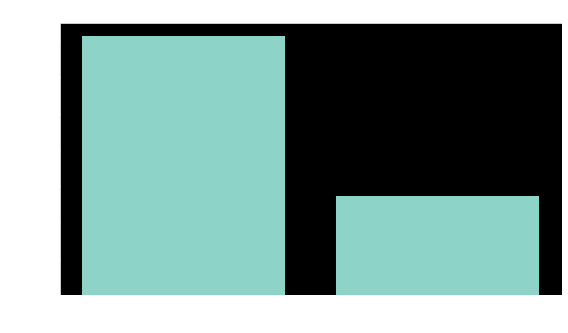

In [6]:

#binary classification
plt.rcParams['figure.figsize'] = (9, 5)
lessthree = rail_incidentcount.loc[rail_incidentcount.lt(3)]
threeplus = rail_incidentcount.loc[rail_incidentcount.gt(2)]
binary_labels = ['Lower-Risk (<3 Incidents)', 'Higher-Risk (3+ Incidents)']
binary_data = [len(lessthree), len(threeplus)]
plt.figure()
plt.style.use('dark_background')
plt.xticks(range(len(binary_data)), binary_labels)
plt.xlabel('Binary Risk Class')
plt.ylabel('Instances in Class')
plt.title('Counts of Binary Risk Class Instances')
plt.bar(range(len(binary_data)),binary_data)
plt.show()

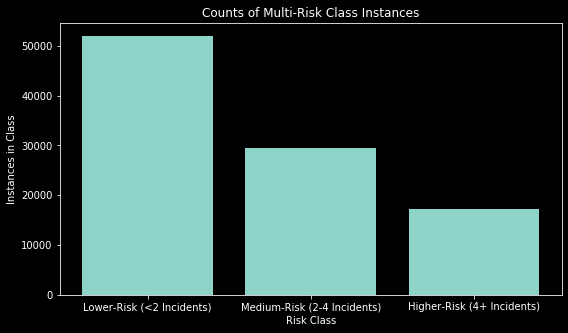

51960 29476 17207


In [7]:
#### multiclass classification
plt.rcParams['figure.figsize'] = (9,5)
lessthree = rail_incidentcount.loc[rail_incidentcount.lt(2)]
threefive = rail_incidentcount.loc[rail_incidentcount.between(2,3)]
fiveplus = rail_incidentcount.loc[rail_incidentcount.gt(3)]
multi_labels = ['Lower-Risk (<2 Incidents)', 'Medium-Risk (2-4 Incidents)', 'Higher-Risk (4+ Incidents)']
multi_data = [len(lessthree), len(threefive), len(fiveplus)]
plt.figure()
plt.style.use('dark_background')
plt.xticks(range(len(multi_data)), multi_labels)
plt.xlabel('Risk Class')
plt.ylabel('Instances in Class')
plt.title('Counts of Multi-Risk Class Instances')
plt.bar(range(len(multi_data)),multi_data)
plt.show()
print(len(lessthree), len(threefive), len(fiveplus))

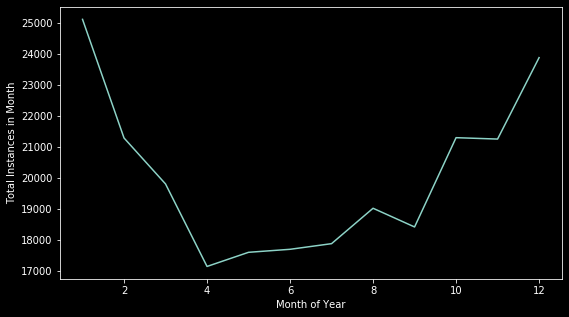

In [8]:
railmonth_incidentcount = railcrossing['Incident Month'].value_counts()
railmonth_incidentcount = railmonth_incidentcount.drop(0)
railmonth_incidentcount
plt.figure()
plt.style.use('dark_background')
plt.xlabel('Month of Year')
plt.ylabel('Total Instances in Month')
plt.plot(railmonth_incidentcount.sort_index())